In [ ]:
import pandas as pd

# Define the dataset for agricultural water requirements
rwanda_agricultural_data = {
    'crops': [
        'Maize', 'Rice', 'Sorghum', 'Wheat', 'Millet', 
        'Cassava', 'Sweet Potatoes', 'Irish Potatoes', 'Yams', 'Taro',
        'Beans', 'Soybeans', 'Groundnuts', 'Peas', 'Green Grams',
        'Coffee', 'Tea', 'Pyrethrum', 'Sugarcane', 'Cotton',
        'Banana', 'Avocado', 'Mango', 'Pineapple', 'Passion Fruit', 'Tree Tomato',
        'Tomatoes', 'Cabbage', 'Carrots', 'Onions', 'Green Peppers', 'Eggplant',
        'Sunflower', 'Palm Oil', 'Macadamia', 'Ginger', 'Chili Peppers', 'Vanilla'
    ],
    
    'base_water_requirements': {
        'low_altitude': {  # Eastern Province (1000-1500m)
            'dry_season': [650, 1200, 450, 450, 400, 900, 550, 600, 750, 800, 400, 450, 500, 350, 380, 1600, 2000, 700, 1800, 900, 1800, 800, 1000, 1200, 900, 850, 400, 380, 400, 350, 600, 450, 600, 1200, 900, 800, 500, 900],
            'rainy_season': [455, 840, 315, 315, 280, 630, 385, 420, 525, 560, 280, 315, 350, 245, 266, 1120, 1400, 490, 1260, 630, 1260, 560, 700, 840, 630, 595, 280, 266, 280, 245, 420, 315, 420, 840, 630, 560, 350, 630]
        },
        'mid_altitude': {  # Central and Southern Provinces (1500-2000m)
            'dry_season': [600, 1100, 400, 425, 375, 850, 500, 550, 700, 750, 375, 425, 475, 325, 355, 1500, 1900, 650, 1700, 850, 1700, 750, 950, 1150, 850, 800, 375, 355, 375, 325, 550, 425, 550, 1150, 850, 750, 475, 850],
            'rainy_season': [420, 770, 280, 298, 263, 595, 350, 385, 490, 525, 263, 298, 333, 228, 249, 1050, 1330, 455, 1190, 595, 1190, 525, 665, 805, 595, 560, 263, 249, 263, 228, 385, 298, 385, 805, 595, 525, 333, 595]
        },
        'high_altitude': {  # Northern and Western Provinces (>2000m)
            'dry_season': [550, 1000, 350, 400, 350, 800, 450, 500, 650, 700, 350, 400, 450, 300, 330, 1400, 1800, 600, 1600, 800, 1600, 700, 900, 1100, 800, 750, 350, 330, 350, 300, 500, 400, 500, 1100, 800, 700, 450, 800],
            'rainy_season': [385, 700, 245, 280, 245, 560, 315, 350, 455, 490, 245, 280, 315, 210, 231, 980, 1260, 420, 1120, 560, 1120, 490, 630, 770, 560, 525, 245, 231, 245, 210, 350, 280, 350, 770, 560, 490, 315, 560]
        }
    },
    
    'soil_type_adjustments': {
        'sandy': 1.3, 'loamy': 1.0, 'clay': 0.8, 'silty': 0.9, 'peaty': 0.7
    },
    
    'slope_adjustments': {
        '0-5': 1.0, '5-10': 1.2, '10-15': 1.4, '>15': 1.6
    },
    
    'critical_growth_stages': {
        'germination': 1.2, 'vegetative': 1.0, 'flowering': 1.5, 'fruit_development': 1.3, 'maturity': 0.7
    },
    
    'environmental_factors': {
        'temperature_adjustment': {'<15': 0.8, '15-25': 1.0, '25-30': 1.2, '>30': 1.4},
        'humidity_adjustment': {'<40': 1.3, '40-60': 1.1, '60-80': 1.0, '>80': 0.9},
        'wind_speed_adjustment': {'<2': 1.0, '2-5': 1.1, '5-8': 1.2, '>8': 1.3}
    }
}

# Convert to DataFrame for easier manipulation
df = pd.DataFrame({
    'crop': rwanda_agricultural_data['crops'],
    'low_altitude_dry': rwanda_agricultural_data['base_water_requirements']['low_altitude']['dry_season'],
    'low_altitude_wet': rwanda_agricultural_data['base_water_requirements']['low_altitude']['rainy_season'],
    'mid_altitude_dry': rwanda_agricultural_data['base_water_requirements']['mid_altitude']['dry_season'],
    'mid_altitude_wet': rwanda_agricultural_data['base_water_requirements']['mid_altitude']['rainy_season'],
    'high_altitude_dry': rwanda_agricultural_data['base_water_requirements']['high_altitude']['dry_season'],
    'high_altitude_wet': rwanda_agricultural_data['base_water_requirements']['high_altitude']['rainy_season']
})

# Function to apply adjustments based on soil type, slope, environmental factors, and growth stage
def apply_adjustments(row, soil_type, slope, temp, humidity, wind_speed, growth_stage):
    # Apply soil, slope, environmental factors, and growth stage adjustments
    soil_factor = rwanda_agricultural_data['soil_type_adjustments'].get(soil_type, 1.0)
    slope_factor = rwanda_agricultural_data['slope_adjustments'].get(slope, 1.0)
    temp_factor = rwanda_agricultural_data['environmental_factors']['temperature_adjustment'].get(temp, 1.0)
    humidity_factor = rwanda_agricultural_data['environmental_factors']['humidity_adjustment'].get(humidity, 1.0)
    wind_speed_factor = rwanda_agricultural_data['environmental_factors']['wind_speed_adjustment'].get(wind_speed, 1.0)
    growth_factor = rwanda_agricultural_data['critical_growth_stages'].get(growth_stage, 1.0)

    for season in ['dry', 'wet']:
        for altitude in ['low', 'mid', 'high']:
            base_column = f'{altitude}_altitude_{season}'
            adjusted_column = f'{altitude}_altitude_{season}_adjusted'
            df[adjusted_column] = row[base_column] * soil_factor * slope_factor * temp_factor * humidity_factor * wind_speed_factor * growth_factor

    return row

# Apply adjustments to the dataset for specific conditions
df = df.apply(apply_adjustments, axis=1, soil_type='loamy', slope='5-10', temp='20-25', humidity='60-80', wind_speed='2-5', growth_stage='vegetative')

# Debug: Print column names to ensure the new columns are added
print(df.columns)


# Save the dataset
df.to_csv('../data/crop_requirements.csv', index=False)


Index(['crop', 'low_altitude_dry', 'low_altitude_wet', 'mid_altitude_dry',
       'mid_altitude_wet', 'high_altitude_dry', 'high_altitude_wet'],
      dtype='object')



Detailed Model Results:
--------------------------------------------------------------------------------

Neural Network:
R² Score: 0.9752
RMSE: 0.20
Cross-validation R² (mean ± std): -3.7397 ± 3.8162

Ridge:
R² Score: 0.9299
RMSE: 0.34
Cross-validation R² (mean ± std): -0.3441 ± 2.5427

Linear Regression:
R² Score: 0.8872
RMSE: 0.43
Cross-validation R² (mean ± std): -0.2174 ± 2.1191

Gradient Boosting:
R² Score: 0.8554
RMSE: 0.49
Cross-validation R² (mean ± std): 0.1314 ± 0.9534

Random Forest:
R² Score: 0.7635
RMSE: 0.63
Cross-validation R² (mean ± std): 0.2389 ± 0.8102

Lasso:
R² Score: 0.3053
RMSE: 1.08
Cross-validation R² (mean ± std): -0.1161 ± 0.3581

SVR:
R² Score: 0.2252
RMSE: 1.14
Cross-validation R² (mean ± std): -0.3775 ± 1.0640

Best Performing Model:
--------------------------------------------------------------------------------
Model: Neural Network
R² Score: 0.9752
RMSE: 0.20


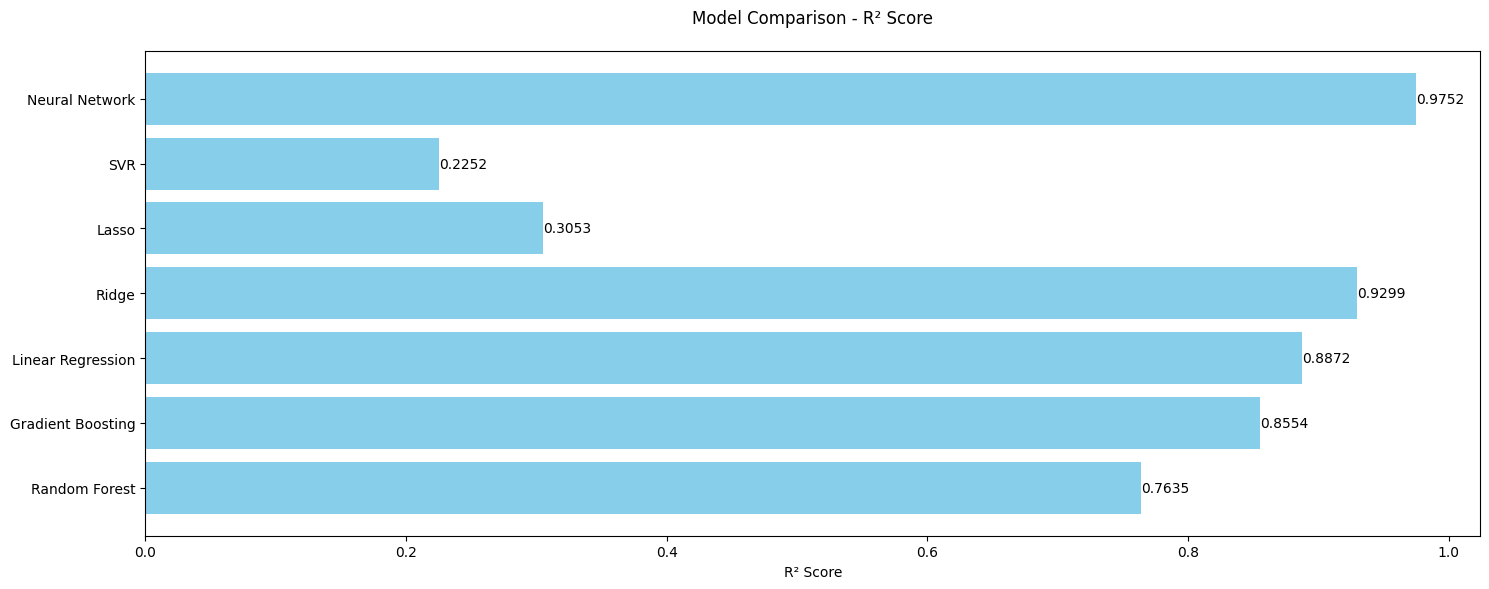

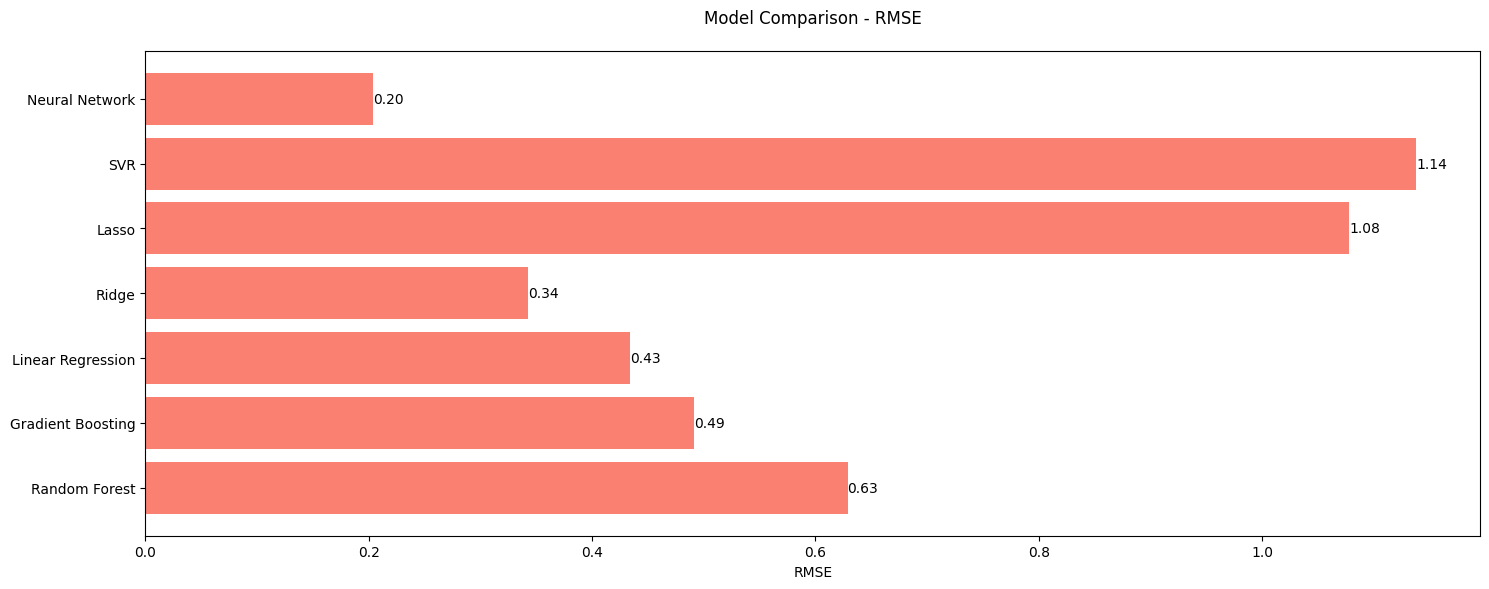


Best model saved as: best_model_neural_network.joblib


In [41]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns

class CropWaterRequirementModelComparison:
    def __init__(self):
        self.models = {
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(random_state=42),
            'Linear Regression': LinearRegression(),
            'Ridge': Ridge(random_state=42),
            'Lasso': Lasso(random_state=42),
            'SVR': SVR(kernel='rbf'),
            'Neural Network': MLPRegressor(
                hidden_layer_sizes=(100, 50),
                max_iter=2000,
                learning_rate_init=0.001,
                early_stopping=True,
                validation_fraction=0.1,
                n_iter_no_change=10,
                random_state=42
            )
        }
        self.scaler = StandardScaler()
        self.best_model = None
        self.best_model_name = None
        self.best_score = -np.inf
        self.feature_names = None
        self.results = {}

    def prepare_data(self, agricultural_data):
        """Prepare the dataset for training"""
        crops_data = []

        for altitude in ['low_altitude', 'mid_altitude', 'high_altitude']:
            base_data = agricultural_data['base_water_requirements'][altitude]
            for season in ['dry_season', 'rainy_season']:
                for idx, crop in enumerate(agricultural_data['crops']):
                    crops_data.append({
                        'crop': crop,
                        'altitude_type': altitude,
                        'season': season,
                        'water_requirement': base_data[season][idx],
                        'altitude_numeric': 1000 if altitude == 'low_altitude' else \
                                             1500 if altitude == 'mid_altitude' else 2000
                    })

        return pd.DataFrame(crops_data)

    def evaluate_models(self, agricultural_data):
        """Evaluate all models and compare their performance"""
        # Prepare data
        df = self.prepare_data(agricultural_data)
        df_encoded = pd.get_dummies(df, columns=['crop', 'altitude_type', 'season'], drop_first=True)

        # Store feature names
        self.feature_names = df_encoded.columns.drop('water_requirement')

        # Split features and target
        X = df_encoded.drop('water_requirement', axis=1)
        y = df_encoded['water_requirement']

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        # Evaluate each model
        for name, model in self.models.items():
            try:
                # Train and evaluate
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)

                # Calculate metrics
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                r2 = r2_score(y_test, y_pred)

                # Perform cross-validation
                kfold = KFold(n_splits=5, shuffle=True, random_state=42)
                cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='r2')

                # Store results
                self.results[name] = {
                    'mse': mse,
                    'rmse': rmse,
                    'r2': r2,
                    'cv_mean': cv_scores.mean(),
                    'cv_std': cv_scores.std()
                }

                # Update best model
                if r2 > self.best_score:
                    self.best_score = r2
                    self.best_model = model
                    self.best_model_name = name

            except Exception as e:
                print(f"Error evaluating {name}: {str(e)}")

    def plot_model_comparison(self):
        """Plot model comparison results"""
        # Prepare data for plotting
        model_names = list(self.results.keys())
        r2_scores = [results['r2'] for results in self.results.values()]
        rmse_scores = [results['rmse'] for results in self.results.values()]

        # Plot R² scores
        plt.figure(figsize=(15, 6))
        plt.barh(model_names, r2_scores, color='skyblue')
        plt.title('Model Comparison - R² Score', pad=20)
        plt.xlabel('R² Score')
        for i, v in enumerate(r2_scores):
            plt.text(v, i, f'{v:.4f}', va='center')
        plt.tight_layout()
        plt.show()

        # Plot RMSE scores
        plt.figure(figsize=(15, 6))
        plt.barh(model_names, rmse_scores, color='salmon')
        plt.title('Model Comparison - RMSE', pad=20)
        plt.xlabel('RMSE')
        for i, v in enumerate(rmse_scores):
            plt.text(v, i, f'{v:.2f}', va='center')
        plt.tight_layout()
        plt.show()

    def print_results(self):
        """Print detailed results for all models"""
        print("\nDetailed Model Results:")
        print("-" * 80)

        # Sort models by R² score
        sorted_results = dict(sorted(self.results.items(), key=lambda x: x[1]['r2'], reverse=True))

        for name, results in sorted_results.items():
            print(f"\n{name}:")
            print(f"R² Score: {results['r2']:.4f}")
            print(f"RMSE: {results['rmse']:.2f}")
            print(f"Cross-validation R² (mean ± std): {results['cv_mean']:.4f} ± {results['cv_std']:.4f}")

        print("\nBest Performing Model:")
        print("-" * 80)
        print(f"Model: {self.best_model_name}")
        print(f"R² Score: {self.results[self.best_model_name]['r2']:.4f}")
        print(f"RMSE: {self.results[self.best_model_name]['rmse']:.2f}")

    def save_best_model(self):
        """Save the best performing model"""
        if self.best_model is not None:
            model_filename = f'best_model_{self.best_model_name.lower().replace(" ", "_")}.joblib'
            model_data = {
                'model': self.best_model,
                'scaler': self.scaler,
                'feature_names': self.feature_names,
                'metrics': self.results[self.best_model_name]
            }
            joblib.dump(model_data, model_filename)
            print(f"\nBest model saved as: {model_filename}")

# Example usage
if __name__ == "__main__":
    # Example data structure
    rwanda_agricultural_data = {
        'crops': ['maize', 'beans', 'sorghum'],
        'base_water_requirements': {
            'low_altitude': {
                'dry_season': [5.0, 4.0, 3.5],
                'rainy_season': [2.5, 2.0, 1.5]
            },
            'mid_altitude': {
                'dry_season': [6.0, 5.0, 4.0],
                'rainy_season': [3.0, 2.5, 2.0]
            },
            'high_altitude': {
                'dry_season': [7.0, 6.0, 5.0],
                'rainy_season': [3.5, 3.0, 2.5]
            }
        }
    }

    model_comparison = CropWaterRequirementModelComparison()
    model_comparison.evaluate_models(rwanda_agricultural_data)
    model_comparison.print_results()
    model_comparison.plot_model_comparison()
    model_comparison.save_best_model()


In [53]:
import pandas as pd
import numpy as np
import joblib
from datetime import datetime

# Load the saved model
model_data = joblib.load('./best_model_neural_network.joblib')  # Adjust filename as per saved model
scaler = model_data['scaler']
model = model_data['model']
feature_names = model_data['feature_names']

# Define a function to encode the crop dynamically
def encode_crop(crop_name, feature_names):
    crop_features = [f"crop_{crop_name}"]
    encoded = {feature: 1 if feature in crop_features else 0 for feature in feature_names if "crop_" in feature}
    return encoded

# Define a function to determine the season based on the date
def determine_season(date=None):
    if date is None:
        date = datetime.now()
    month = date.month

    # Example logic for a region with two seasons: dry and rainy
    if month in [11, 12, 1, 2, 3]:  # Adjust months based on local seasons
        return "dry_season"
    else:
        return "rainy_season"

def encode_season(season_name, feature_names):
    season_features = [f"season_{season_name}"]
    encoded = {feature: 1 if feature in season_features else 0 for feature in feature_names if "season_" in feature}
    return encoded

# Define a function to determine altitude type based on elevation
def determine_altitude_type(elevation):
    if elevation < 1000:
        return "low_altitude"
    elif 1000 <= elevation <= 2000:
        return "mid_altitude"
    else:
        return "high_altitude"

def encode_altitude(altitude_type, feature_names):
    altitude_features = [f"altitude_type_{altitude_type}"]
    encoded = {feature: 1 if feature in altitude_features else 0 for feature in feature_names if "altitude_type_" in feature}
    return encoded

# Input data
test_data = {
    'latitude': -1.4998,
    'longitude': 29.635,
    'temperature': 22.6,
    'humidity': 59,
    'wind_speed': 1.99,
    'rainfall': 0.22,
    'N': 113.76813179702158,
    'P': 32.89884134591722,
    'K': 23.76722343927049,
    'ph': 6.4684750211901445,
    'elevation': 1831.6209369236503,
    'slope': 16.36047617015931,
    'aspect': 115.34872347057455,
    'water_holding_capacity': 0.7454503550764091,
    'solar_radiation': 18.952029257962337,
    'ec': 0.42861049088649733,
    'zn': 1.2577146456435215,
}

# Add dynamic crop encoding
crop_name = "coffee"  # Replace with desired crop
test_data.update(encode_crop(crop_name, feature_names))

# Determine season and encode
season_name = determine_season()  # Dynamically determined
test_data.update(encode_season(season_name, feature_names))

# Determine altitude type and encode
altitude_type = determine_altitude_type(test_data['elevation'])
test_data.update(encode_altitude(altitude_type, feature_names))

# Prepare the data for prediction
df_test = pd.DataFrame([test_data])
df_test = df_test.reindex(columns=feature_names, fill_value=0)  # Align to training data columns
X_test_scaled = scaler.transform(df_test)

# Predict water requirement
predicted_water_requirement = model.predict(X_test_scaled)

# Output result
print(f"Predicted Water Requirement for {crop_name}: {predicted_water_requirement[0]:.2f} mm/day")


Predicted Water Requirement for coffee: 5.53 mm/day


In [1]:
import pandas as pd
import joblib
from datetime import datetime

def predict_water_requirement(weather_data, soil_data, crop_name):
    """
    Predict the water requirement for a given crop based on weather and soil data.
    
    Parameters:
        weather_data (dict): Dictionary containing weather data.
        soil_data (dict): Dictionary containing soil data.
        crop_name (str): Name of the predicted crop.
        
    Returns:
        float: Predicted water requirement in mm/day.
    """
    # Load the saved model
    model_data = joblib.load('./best_model_neural_network.joblib')  # Adjust path as needed
    scaler = model_data['scaler']
    model = model_data['model']
    feature_names = model_data['feature_names']
    
    # Combine weather and soil data
    test_data = {**weather_data, **soil_data}
    
    # Helper function to encode the crop dynamically
    def encode_crop(crop_name, feature_names):
        crop_features = [f"crop_{crop_name}"]
        return {feature: 1 if feature in crop_features else 0 for feature in feature_names if "crop_" in feature}
    
    # Helper function to determine the season based on the date
    def determine_season():
        month = datetime.now().month
        if month in [11, 12, 1, 2, 3]:  # Example logic: adjust as per local seasons
            return "dry_season"
        else:
            return "rainy_season"
    
    # Helper function to encode the season
    def encode_season(season_name, feature_names):
        season_features = [f"season_{season_name}"]
        return {feature: 1 if feature in season_features else 0 for feature in feature_names if "season_" in feature}
    
    # Helper function to determine altitude type
    def determine_altitude_type(elevation):
        if elevation < 1000:
            return "low_altitude"
        elif 1000 <= elevation <= 2000:
            return "mid_altitude"
        else:
            return "high_altitude"
    
    # Helper function to encode altitude type
    def encode_altitude(altitude_type, feature_names):
        altitude_features = [f"altitude_type_{altitude_type}"]
        return {feature: 1 if feature in altitude_features else 0 for feature in feature_names if "altitude_type_" in feature}
    
    # Encode crop
    test_data.update(encode_crop(crop_name, feature_names))
    
    # Determine and encode season
    season_name = determine_season()
    test_data.update(encode_season(season_name, feature_names))
    
    # Determine and encode altitude type
    altitude_type = determine_altitude_type(test_data['elevation'])
    test_data.update(encode_altitude(altitude_type, feature_names))
    
    # Prepare the data for prediction
    df_test = pd.DataFrame([test_data])
    df_test = df_test.reindex(columns=feature_names, fill_value=0)  # Align to training data columns
    X_test_scaled = scaler.transform(df_test)
    
    # Predict water requirement
    predicted_water_requirement = model.predict(X_test_scaled)
    
    return predicted_water_requirement[0]

# Example input data
weather_data = {
    'latitude': -1.4998,
    'longitude': 29.635,
    'temperature': 22.6,
    'humidity': 59,
    'wind_speed': 1.99,
    'rainfall': 0.22,
}

soil_data = {
    'N': 113.76813179702158,
    'P': 32.89884134591722,
    'K': 23.76722343927049,
    'ph': 6.4684750211901445,
    'elevation': 1831.6209369236503,
    'slope': 16.36047617015931,
    'aspect': 115.34872347057455,
    'water_holding_capacity': 0.7454503550764091,
    'solar_radiation': 18.952029257962337,
    'ec': 0.42861049088649733,
    'zn': 1.2577146456435215,
}

crop_name = "Maize"

# Predict and print result
predicted_water_requirement = predict_water_requirement(weather_data, soil_data, crop_name)
print(f"Predicted Water Requirement for {crop_name}: {predicted_water_requirement:.2f} mm/day")


Predicted Water Requirement for Maize: 5.53 mm/day
